<a href="https://colab.research.google.com/github/ashivashankars/CMPE255_Assignments/blob/main/5_Anomaly_detection_using_pyOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Demonstrate anomaly detection using a `pyOD` model on generated synthetic data, visualizing the data with detected anomalies clearly highlighted and summarized.

## Generate Sample Data

### Subtask:
Generate synthetic data (e.g., a time series or a simple multi-dimensional dataset) and inject some anomalies to demonstrate anomaly detection.


**Reasoning**:
First, import the necessary libraries, set a random seed for reproducibility, then generate normal data points from two clusters and a few anomalous data points. Finally, concatenate them into a single array and create a pandas DataFrame named `df_data`.



In [1]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a primary cluster of normal data points
normal_data_1 = np.random.randn(200) * 1 + 0  # 200 points, mean 0, std 1

# Generate a secondary cluster of normal data points
normal_data_2 = np.random.randn(50) * 1.5 + 5  # 50 points, mean 5, std 1.5

# Generate a small number of anomalous data points
anomalies = np.random.uniform(low=-10, high=-5, size=5) # 5 anomalies between -10 and -5
anomalies = np.append(anomalies, np.random.uniform(low=10, high=15, size=5)) # 5 anomalies between 10 and 15

# Concatenate all generated data points
combined_data = np.concatenate([normal_data_1, normal_data_2, anomalies])

# Create a pandas DataFrame from the combined data
df_data = pd.DataFrame(combined_data, columns=['feature_1'])

print("DataFrame 'df_data' created with synthetic data and anomalies. Head of the DataFrame:")
print(df_data.head())
print("\nTail of the DataFrame (showing some anomalies if present at the end):")
print(df_data.tail())

DataFrame 'df_data' created with synthetic data and anomalies. Head of the DataFrame:
   feature_1
0   0.496714
1  -0.138264
2   0.647689
3   1.523030
4  -0.234153

Tail of the DataFrame (showing some anomalies if present at the end):
     feature_1
255  13.058604
256  12.098000
257  11.238655
258  11.779863
259  13.789231


## Install PyOD and Import Libraries

### Subtask:
Install the `pyOD` library if it's not already installed, and import all necessary libraries for data generation, anomaly detection, and visualization (e.g., pandas, numpy, matplotlib, and specific models from pyod).


**Reasoning**:
Install the `pyOD` library using pip.



In [2]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 kB 11.2 MB/s eta 0:00:00


**Reasoning**:
Now that `pyOD` is installed, import all necessary libraries as specified in the subtask: pandas, numpy, matplotlib.pyplot, and IsolationForest from pyod.models.iforest.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.iforest import IsolationForest

print("Necessary libraries imported.")

Necessary libraries imported.


## Train Anomaly Detection Model

### Subtask:
Train an Isolation Forest model from `pyOD` on the generated synthetic data.


### Reasoning:
Initialize an `IsolationForest` model, specifying `random_state` for reproducibility and `contamination` based on the estimated anomaly proportion (around 5% in our synthetic data). Then, fit the model to the `feature_1` column from `df_data`, ensuring the input is reshaped to a 2D array as required by `pyOD` models.

**Reasoning**:
Instantiate the IsolationForest model with specified parameters and then fit it to the 'feature_1' column of the `df_data` DataFrame, reshaping the data as required.



In [4]:
model = IsolationForest(random_state=42, contamination=0.05)
model.fit(df_data['feature_1'].values.reshape(-1, 1))

print("Isolation Forest model initialized and fitted successfully.")

Isolation Forest model initialized and fitted successfully.


## Detect Anomalies and Obtain Anomaly Scores

### Subtask:
Apply the trained Isolation Forest model to detect anomalies in the `df_data` and obtain anomaly scores.

#### Instructions:
1. Use the `decision_function` method of the fitted model to get raw anomaly scores for each data point.
2. Use the `predict` method to get binary anomaly labels (0 for inliers, 1 for outliers).
3. Add these scores and labels as new columns to the `df_data` DataFrame.

**Reasoning**:
First, use the `decision_function` method of the trained `IsolationForest` model to compute the anomaly scores for each data point in `df_data` and store them in a new column named 'anomaly_score'. Then, use the `predict` method to classify each data point as an inlier (0) or outlier (1) and store these labels in a new column named 'anomaly_label'.



In [5]:
df_data['anomaly_score'] = model.decision_function(df_data['feature_1'].values.reshape(-1, 1))
df_data['anomaly_label'] = model.predict(df_data['feature_1'].values.reshape(-1, 1))

print("Anomaly scores and labels added to df_data.")
print("Head of df_data with new columns:")
print(df_data.head())
print("\nTail of df_data with new columns:")
print(df_data.tail())


Anomaly scores and labels added to df_data.
Head of df_data with new columns:
   feature_1  anomaly_score  anomaly_label
0   0.496714       0.238306              1
1  -0.138264       0.240807              1
2   0.647689       0.232197              1
3   1.523030       0.203939              1
4  -0.234153       0.258424              1

Tail of df_data with new columns:
     feature_1  anomaly_score  anomaly_label
255  13.058604      -0.065422             -1
256  12.098000      -0.019759             -1
257  11.238655      -0.009664             -1
258  11.779863      -0.008594             -1
259  13.789231      -0.118419             -1


## Detect Anomalies and Visualize Results

### Subtask:
Visualize the data, clearly highlighting the detected anomalies, and summarize the model's performance.


**Reasoning**:
To visualize the anomalies, I need to filter the DataFrame into inliers and outliers based on the 'anomaly_label' column, and then create a scatter plot to distinguish them visually with different colors.



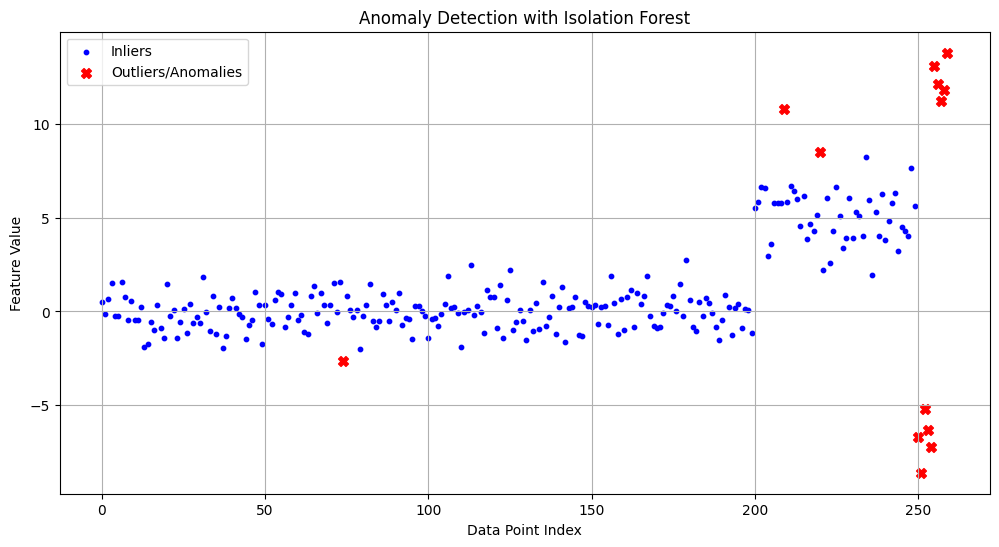

Total data points: 260
Number of inliers detected: 247
Number of outliers detected: 13


In [6]:
inliers = df_data[df_data['anomaly_label'] == 1]
outliers = df_data[df_data['anomaly_label'] == -1]

plt.figure(figsize=(12, 6))
plt.scatter(inliers.index, inliers['feature_1'], color='blue', label='Inliers', s=10)
plt.scatter(outliers.index, outliers['feature_1'], color='red', label='Outliers/Anomalies', s=50, marker='X')

plt.xlabel('Data Point Index')
plt.ylabel('Feature Value')
plt.title('Anomaly Detection with Isolation Forest')
plt.legend()
plt.grid(True)
plt.show()

print(f"Total data points: {len(df_data)}")
print(f"Number of inliers detected: {len(inliers)}")
print(f"Number of outliers detected: {len(outliers)}")